#### **5: PCA , Decision Trees & K-Means**
- **Author**  : Sumashree Javaji
- **Datasets** :
    - Event_entry.csv - This dataset has the ticket details of every induvidual who got entry to the event along with personal details
- **Dataset Description** : Event Entry details
- **Problem Statement** : The goal is to predict If the entry to the event will be granted on not. 

#### **Data Exploration , Visualization and Data Cleaning**
- Explore Event_entry(in Files) dataset.
- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
Include any other plots you find interesting and provide brief interpretations.

**Observations**
- Original dataset has 869 rows & 9 columns
- has more number of male details with 64.9%
- has more number of ticket class 3 with 55%
- Ticket class 3 is popular as it's price is the lowest of all
- more people from age bracket 15 years - 35 years
- irrspective of bank balance people are buying low priced tickets (i.e. ticket class 3 or ticket class 2 tickets)
- entry into the event is not related to the bank balance of an induvidual
- from the correlation plot , we can see that ticket class & price have high correlation (i.e ticket price increases with higher ticket classses (1 being the highest ticket class )
- checked if any specific ticket class people are getting denied to the events more, but the plots show almost equal distribution b/w event entry & tickt classes

**Data Cleaning & encoding**
- age has 175 missng values
- missing value handling - dropping the missing values (new dataset has 694 rows & 9 columns)
- encoding the Sex column and keeping the male indicator

#### Importing necessary libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
dataset=pd.read_csv('Event_entry.csv')

In [3]:
dataset.shape

(869, 9)

In [4]:
dataset.head()

,Entry,TicketClass,Sex,Age,Price,Order,Name,Ticket Number,Bank Balance
0,0,3,male,22.0,7,1,"Braund, Mr. Owen Harris",648155,74389
1,1,1,female,38.0,71,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",119239,94932
2,1,3,female,26.0,8,3,"Heikkinen, Miss. Laina",411408,26146
3,1,1,female,35.0,53,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",530093,35627
4,0,3,male,35.0,8,5,"Allen, Mr. William Henry",510583,60457


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


In [6]:
round((dataset['Sex'].value_counts()/len(dataset)*100),2)

Sex
male      64.9
female    35.1
Name: count, dtype: float64

In [7]:
round((dataset['TicketClass'].value_counts()/len(dataset)*100),2)

TicketClass
3    55.01
1    24.28
2    20.71
Name: count, dtype: float64

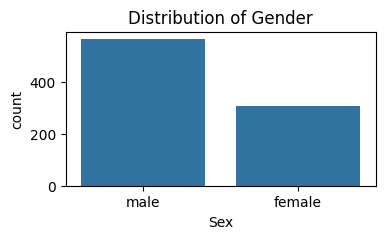

In [99]:
plt.figure(figsize=(4, 2))
sns.countplot(x='Sex', data=dataset)
plt.title('Distribution of Gender')
plt.show()

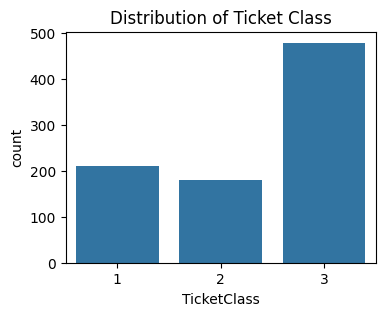

In [100]:
plt.figure(figsize=(4, 3))
sns.countplot(x='TicketClass', data=dataset)
plt.title('Distribution of Ticket Class')
plt.show()

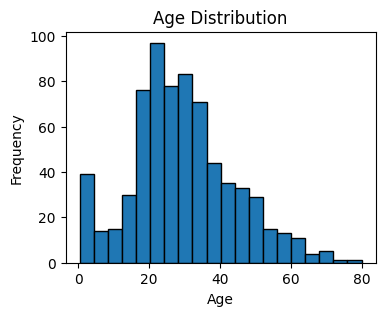

In [101]:
plt.figure(figsize=(4, 3))
plt.hist(dataset['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Figure size 400x300 with 0 Axes>

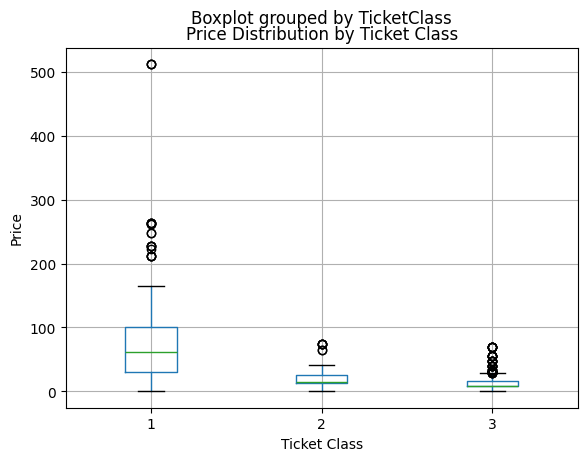

In [102]:
plt.figure(figsize=(4, 3))
dataset.boxplot(column='Price', by='TicketClass')
plt.title('Price Distribution by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Price')
plt.grid(True)
plt.show()

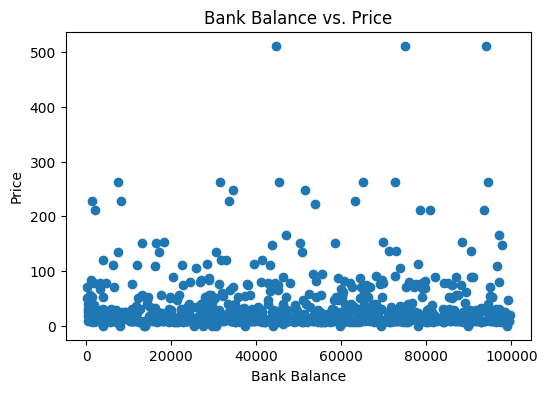

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(dataset['Bank Balance'], dataset['Price'])
plt.title('Bank Balance vs. Price')
plt.xlabel('Bank Balance')
plt.ylabel('Price')
plt.show()

<Figure size 400x200 with 0 Axes>

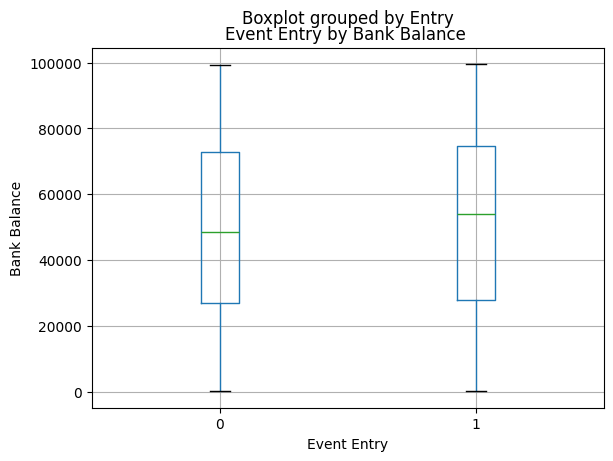

In [62]:
## shows that the entry into the event is not related to the bank balance of an induvidual
plt.figure(figsize=(4, 2))
dataset.boxplot(column='Bank Balance', by='Entry')
plt.title('Event Entry by Bank Balance ')
plt.xlabel('Event Entry')
plt.ylabel('Bank Balance')
plt.grid(True)
plt.show()

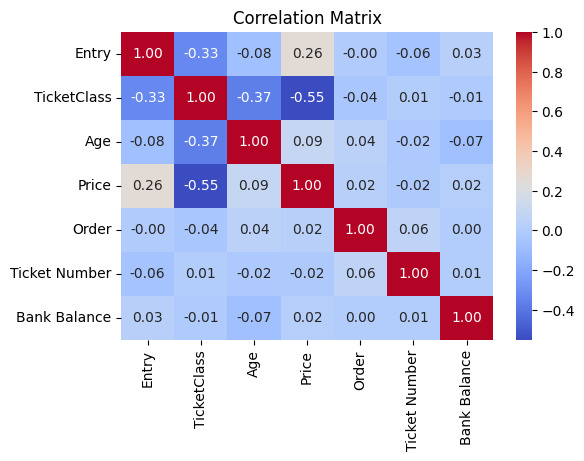

In [60]:
numeric_cols= dataset.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(6, 4))
sns.heatmap(dataset[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Plotting the following graphs to get more insights into the high correlation varibales from the correlation plot 
- Age vs Price
- Entry vs Ticket Class

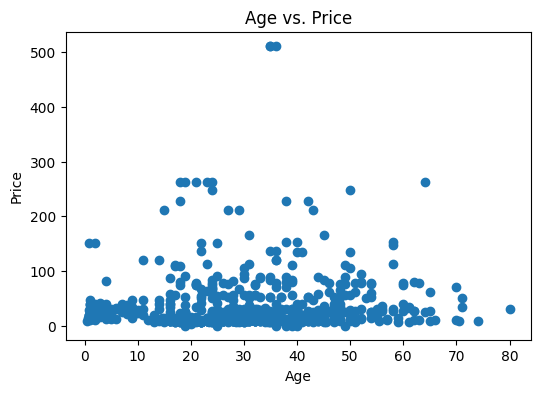

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(dataset['Age'], dataset['Price'])
plt.title('Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 61.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3398: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use s

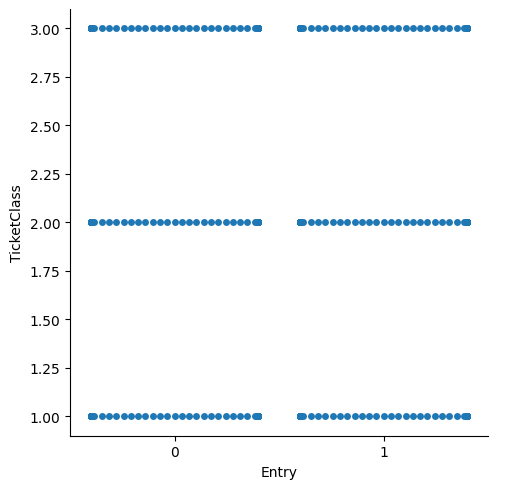

In [16]:
sns.catplot(data=dataset, x="Entry", y="TicketClass", kind="swarm") 
## trying to check if any specific ticket class people are getting denied to the events more, but the plots show almost equal distribution b/w event entry & tickt classes

In [17]:
dataset.isnull().sum()

Entry              0
TicketClass        0
Sex                0
Age              175
Price              0
Order              0
Name               0
Ticket Number      0
Bank Balance       0
dtype: int64

In [18]:
df= dataset.dropna(subset=['Age'])

In [19]:
df.isnull().sum()

Entry            0
TicketClass      0
Sex              0
Age              0
Price            0
Order            0
Name             0
Ticket Number    0
Bank Balance     0
dtype: int64

In [20]:
df.shape

(694, 9)

Note: PCA is an unsupervised learning algorithm, but we can use it for dimensionality reduction in this datasets

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split # to divide the data into training & validation 
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

In [22]:
from sklearn.decomposition import PCA

In [23]:
X = df.loc[:, df.columns != 'Entry']
y = df.loc[:, df.columns == 'Entry']

In [24]:
X= pd.get_dummies(X, columns=['Sex'], drop_first=True)
X[['Sex_male' ]] = X[['Sex_male' ]].astype(int)
X=X.drop(columns=['Name', 'Ticket Number'])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Full Logistic Regression Model

In [27]:
# X = sm.add_constant(X)  # Add a constant (intercept) to the predictors

X = sm.add_constant(X_train) 

# Fit the GLM model
full_model = sm.GLM(y_train, X, family=sm.families.Binomial()).fit()

# Calculate the R^2 value
r_squared = 1 - (full_model.deviance / full_model.null_deviance)

# r_squared
r_squared

0.33205174363856915

In [28]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Entry   No. Observations:                  555
Model:                            GLM   Df Residuals:                      548
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -251.03
Date:                Wed, 03 Apr 2024   Deviance:                       502.06
Time:                        23:26:02   Pearson chi2:                     614.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3622
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.6351      0.689      6.727      0.000       3.285       5.986
TicketClass     -1.2095      0.180     -6.726      0.000      -1.562      -0.857
Age             -0.0406      0.009     -4.646      0.000      -0.058      -0.023
Price            0.0017      0.003      0.672      0.502      -0.003       0.007
Order            0.0004      0.000      0.912      0.362      -0.000       0.001
Bank Balance  2.436e-06   4.02e-06      0.605      0.545   -5.45e-06    1.03e-05
Sex_male        -2.5278      0.236    -10.729      0.000      -2.990      -2.066
================================================================================
"""

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [30]:
pca.explained_variance_ratio_

array([9.99914448e-01, 8.14747435e-05, 3.79553311e-06, 2.81069315e-07,
       5.61076055e-10, 2.78044041e-10])

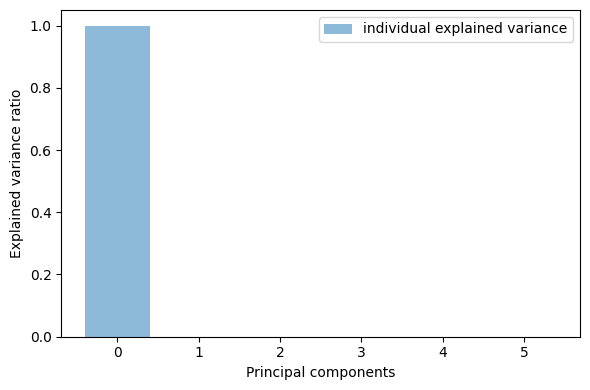

In [31]:
explained_variance=pca.explained_variance_ratio_
plt.figure(figsize=(6, 4))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

#### PCA - 2 components

In [32]:
explained_variance[0]+explained_variance[1]

0.9999959225584532

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_pca[:,:2], y_train)

LinearRegression()

In [34]:
pca_preds_2=model.predict(X_test_pca[:, :2])

In [35]:
mean_squared_error(y_test,pca_preds_2)

0.23846750981064205

In [36]:
r2_score(y_test, pca_preds_2)

-0.003797550555863616

#### PCA - 4 components

In [37]:
explained_variance[0]+explained_variance[1]+explained_variance[2]+explained_variance[3]

0.9999999991608797

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_pca[:,:4], y_train)

LinearRegression()

In [39]:
pca_preds_4=model.predict(X_test_pca[:, :4])

In [40]:
mean_squared_error(y_test,pca_preds_4)

0.224300660389212

In [41]:
r2_score(y_test, pca_preds_4)

0.05583593477560689

#### PCA - 6 components

In [42]:
explained_variance[0]+explained_variance[1]+explained_variance[2]+explained_variance[3]+explained_variance[4]+explained_variance[5]

0.9999999999999998

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_pca[:,:6], y_train)

LinearRegression()

In [44]:
pca_preds_6 = model.predict(X_test_pca[:, :6])

In [45]:
mean_squared_error(y_test,pca_preds_6)

0.15194886979424782

In [46]:
r2_score(y_test, pca_preds_6)

0.3603912607201174

#### **Lasso Logistic Regression**

In [47]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
alphas = np.logspace(-6, 6, 10)

k = 5
n = len(y_train)

# Shuffle the data
indices = np.arange(n)
np.random.shuffle(indices)

In [50]:
X_cv = X_train_scaled[indices]
y_cv = y_train.iloc[indices]

In [51]:
X_train_scaled.shape

(555, 6)

In [52]:
# Use cross-validation to find an optimal regularization strength (alpha) that balances model complexity and predictive performance on new data.
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning) # to ignore printing the warnings to the screen

avg_rmse=[]

for alpha in alphas:
    rmse_list = []

    # Manual k-fold splitting
    for fold in range(k):
        # Calculate the size of each fold
        fold_size = n // k
        
        # Define the start and end indices of the test set
        start, end = fold * fold_size, (fold + 1) * fold_size
        
        test_indices = indices[start:end]
        train_indices = np.concatenate((indices[:start], indices[end:]))
        
        X_train, X_test = X_cv[train_indices], X_cv[test_indices]
        y_train, y_test = y_cv.iloc[train_indices], y_cv.iloc[test_indices]
        
        lasso = Lasso(alpha=alpha)
        
        lasso.fit(X_train, y_train)
        
        y_pred = lasso.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_list.append(rmse)
        
    avg_rmse.append(np.mean(rmse_list))
    
# Find the best alpha
best_alpha = alphas[np.argmin(avg_rmse)]
print(f"Best alpha: {best_alpha}")

Best alpha: 0.00046415888336127773


In [53]:
lasso_cv = Lasso(alpha=0.01)
lasso_cv.fit(X_train, y_train)

# In-sample performance
pred_y = lasso_cv.predict(X_train)

mse = mean_squared_error(y_train, pred_y)
r2 = r2_score(y_train, pred_y)
print("In sample MSE:", mse)
print("In sample R^2:", r2)

In sample MSE: 0.14347718368032583
In sample R^2: 0.39669991079912303


In [54]:
pca = PCA()
X_pca=pca.fit_transform(X_train)

In [55]:
pca_df=pd.DataFrame(X_pca[:,:2], columns=['Component_1','Component_2'])

In [57]:
explained_variance=pca.explained_variance_ratio_

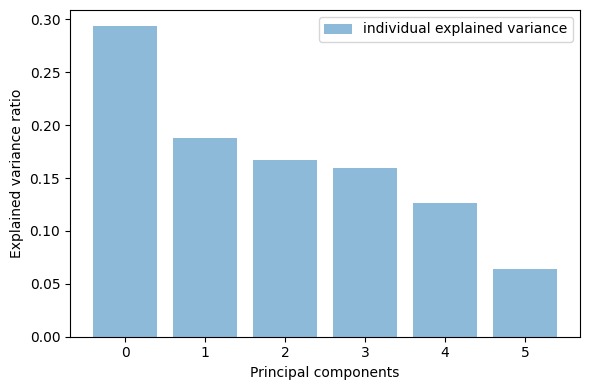

In [58]:
explained_variance=pca.explained_variance_ratio_
plt.figure(figsize=(6, 4))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

#### **Principal Component Analysis**
-  Note: PCA is an unsupervised learning algorithm, but we can use it for dimensionality reduction in our datasets

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split # to divide the data into training & validation 
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

In [64]:
X = df.loc[:, df.columns != 'Entry'] ## extracting all the predictor varibles an storing them in X
y = df.loc[:, df.columns == 'Entry'] ## extracting the response variable & storing them in y

In [65]:
from sklearn.decomposition import PCA

In [66]:
X= pd.get_dummies(X, columns=['Sex'], drop_first=True) # encoding sex column and dropping the base column(female in our case)
X[['Sex_male']] = X[['Sex_male']].astype(int)
X=X.drop(columns=['Name', 'Ticket Number'])

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,TicketClass,Age,Price,Order,Bank Balance,Sex_male
138,3,16.0,9,139,45507,1
105,3,28.0,8,106,87100,1
68,3,17.0,8,69,43589,0
271,3,25.0,0,272,25334,1
782,1,29.0,30,783,63594,1
...,...,...,...,...,...,...
92,1,46.0,61,93,89227,1
134,2,25.0,13,135,41943,1
337,1,41.0,135,338,50656,0
548,3,33.0,21,549,56697,1


#### **Full Logistic Model**
- running a full logistic model with all the columns in the dataset
- Accuracy: 0.8057 (Validation Data)
- MSE : 0.194

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Model MSE is: {mean_squared_error(y_test, y_pred)}')

Accuracy: 0.8057553956834532
Model MSE is: 0.19424460431654678


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        89
           1       0.85      0.56      0.67        50

    accuracy                           0.81       139
   macro avg       0.82      0.75      0.77       139
weighted avg       0.81      0.81      0.79       139



#### **Principal Component Analysis (PCA)**
- PCA always gives a decreasing trend in components explained variance, the 1st component always explains more variance than any other components
- Hence we will usually select the first 2-3 components
- As per the results of PCA logistic regression , it shows that the model with 6 components has highest accuracy & least mse

In [71]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [72]:
pca.explained_variance_ratio_

array([9.99913549e-01, 8.19467680e-05, 4.21593880e-06, 2.87680883e-07,
       5.44834830e-10, 2.75187090e-10])

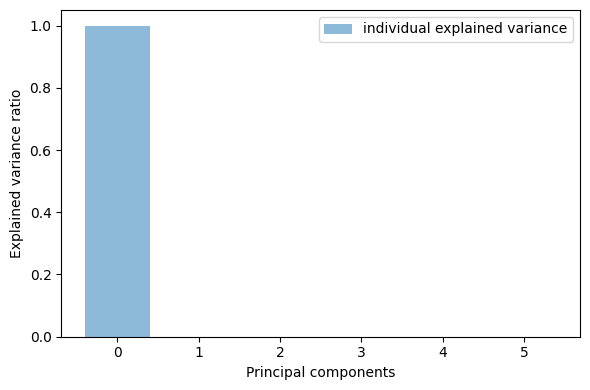

In [73]:
explained_variance=pca.explained_variance_ratio_
plt.figure(figsize=(6, 4))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

#### **PCA - 2 components**

In [74]:
explained_variance[0]+explained_variance[1]

0.9999954955602955

In [75]:
model_pca_2 = LogisticRegression()
model_pca_2.fit(X_train_pca[:,:2], y_train)

# prediction
pca_preds_2 = model_pca_2.predict(X_test_pca[:, :2])
accuracy_2 = accuracy_score(y_test, pca_preds_2)
print(f'Accuracy: {accuracy_2}')
print(f'Model MSE is: {mean_squared_error(y_test, pca_preds_2)}')

Accuracy: 0.6402877697841727
Model MSE is: 0.3597122302158273


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### **PCA - 4 components**

In [76]:
explained_variance[0]+explained_variance[1]+explained_variance[2]+explained_variance[3]

0.9999999991799781

In [77]:
model_pca_4 = LogisticRegression()
model_pca_4.fit(X_train_pca[:,:4], y_train)

# # prediction
pca_preds_4 = model_pca_4.predict(X_test_pca[:, :4])
accuracy_4 = accuracy_score(y_test, pca_preds_4)
print(f'Accuracy: {accuracy_4}')
print(f'Model MSE is: {mean_squared_error(y_test, pca_preds_4)}')

Accuracy: 0.6762589928057554
Model MSE is: 0.3237410071942446


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### **PCA - 6 components**

In [78]:
explained_variance[0]+explained_variance[1]+explained_variance[2]+explained_variance[3]+explained_variance[4]+explained_variance[5]

1.0

In [79]:
model_pca_6 = LogisticRegression()
model_pca_6.fit(X_train_pca[:,:6], y_train)

# # prediction
pca_preds_6 = model_pca_6.predict(X_test_pca[:, :6])
accuracy_6 = accuracy_score(y_test, pca_preds_6)
print(f'Accuracy: {accuracy_6}')
print(f'Model MSE is: {mean_squared_error(y_test, pca_preds_6)}')

Accuracy: 0.8129496402877698
Model MSE is: 0.18705035971223022


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### **Lasso Logistic Regression**
- Accuracy: 0.81
- output of lasso is same as pca given that lasso hasn't removed any columns from the dataset

In [80]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

non_zero_features = sum(lasso_model.coef_[0] != 0)
print(f'Number of non-zero features: {non_zero_features}')

Accuracy: 0.8129496402877698
Number of non-zero features: 6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **Decision Tree Analysis**

In [81]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [82]:
X = df.loc[:, df.columns != 'Entry']
y = df.loc[:, df.columns == 'Entry']

X= pd.get_dummies(X, columns=['Sex'], drop_first=True)
X[['Sex_male' ]] = X[['Sex_male' ]].astype(int)
X=X.drop(columns=['Name', 'Ticket Number','Bank Balance'])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [85]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [86]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7553956834532374


In [87]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        85
           1       0.67      0.72      0.70        54

    accuracy                           0.76       139
   macro avg       0.74      0.75      0.75       139
weighted avg       0.76      0.76      0.76       139



#### Accuracy of the deciso tree measures the proportion of correctly classified evneb entries w.r.t total event entries predicted by the model.
- our model is giving 76.25% results correctly classified
- Precision: Precision is a measure of how many of the predicted positive instances are actually positive.
- Recall: Recall is a measure of how many of the actual positive instances were correctly predicted as positive by the model
- F1-score: balance b/w precision & recall 
-  82% of the instances classified as class 0 are truly class 0
- 64% of the instances classified as class 1 are truly class 1
- 78% of the true class 0 instances are correctly classified as class 0
- 70% of the true class 1 instances are correctly classified as class 1

### **KMeans Clustering**
- Elbow Rule for choosing the number of clusters : The idea is to plot the within-cluster sum of squares (WSS) as a function of the number of clusters, and choose the number of clusters at the "elbow" of the curve, where adding more clusters does not significantly reduce the WSS.
- From the elbow plot, it's clear that optimal number of clusters is 4
- Kmeans clustering plot, shows clear distinction between the 4 clusters. hence k=4 clusters is the optimal solution 

In [88]:
KM_df = df[['Age','Price']]
KM_df.head()

,Age,Price
0,22.0,7
1,38.0,71
2,26.0,8
3,35.0,53
4,35.0,8


In [89]:
ms = MinMaxScaler()
scaled_data = ms.fit_transform(KM_df)
scaled_df = pd.DataFrame(scaled_data, columns=KM_df.columns)  

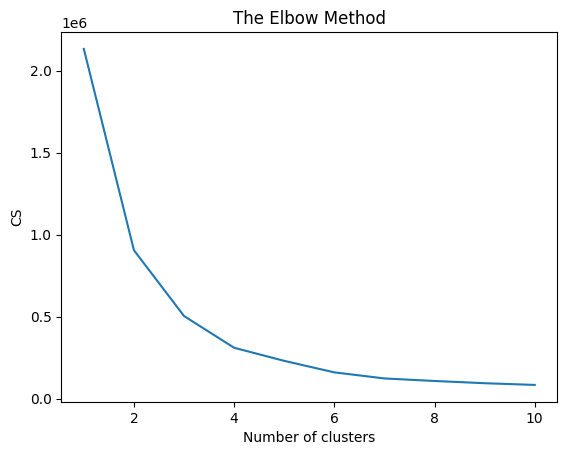

In [90]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(KM_df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [91]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_df)

scaled_df['kmeans_cluster'] = kmeans.labels_
scaled_df.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Price,kmeans_cluster
0,0.271174,0.013672,2
1,0.472229,0.138672,0
2,0.321438,0.015625,0
3,0.434531,0.103516,0
4,0.434531,0.015625,0


In [92]:
scaled_df['kmeans_cluster'].value_counts()

kmeans_cluster
0    314
2    219
1    137
3     24
Name: count, dtype: int64

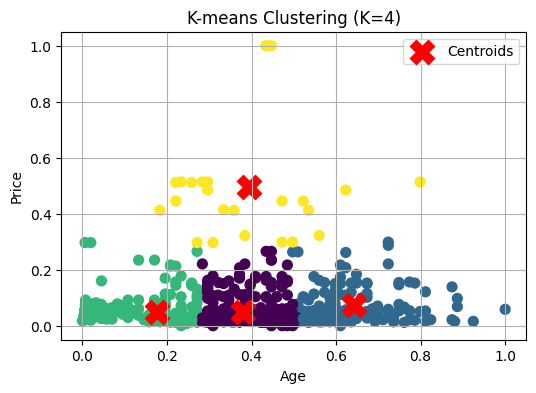

In [95]:
plt.figure(figsize=(6, 4))
plt.scatter(scaled_df['Age'], scaled_df['Price'], c=scaled_df['kmeans_cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering (K=4)')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

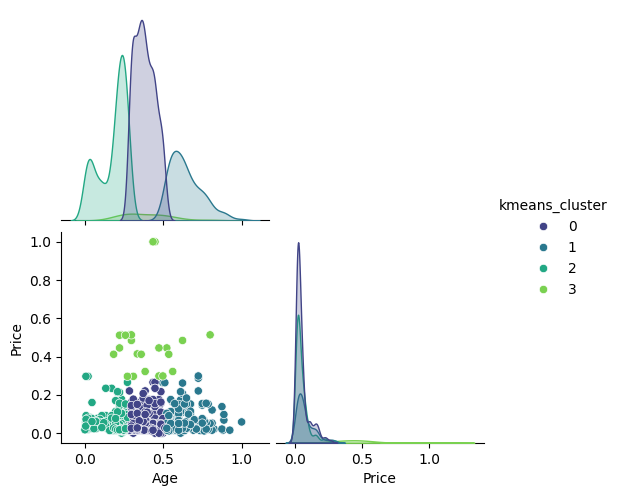

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame and it includes a 'cluster' column with cluster labels
# First, ensure that the 'cluster' column is of a categorical type for better color handling
scaled_df['kmeans_cluster'] = scaled_df['kmeans_cluster'].astype('category')

# Create the pairplot
sns.pairplot(scaled_df, hue='kmeans_cluster', palette='viridis', corner=True)  # `corner=True` to plot only the lower triangle
plt.show()


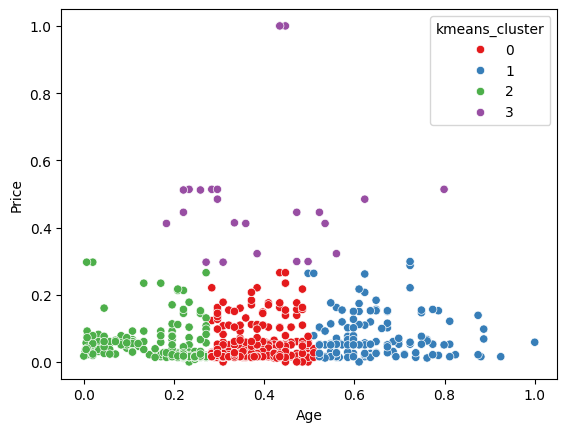

In [97]:
sns.scatterplot(scaled_df, x='Age', y='Price', hue='kmeans_cluster', palette='Set1')
plt.show()

- `silhouette_score` measures how well the data point is related to it's own cluster & how much it differs from the other neighbouring clusters. so a high silhouette_score means that the cluster matches well with it's own & differs with others.
- score ranges from -1 to 1. Score closer to 1 indicates that the sample is well matched to its own cluster and poorly matched to neighboring clusters
- From the above plot, it's clear that 4 clusters has done good seperation of data points

In [98]:
silhouette_score(scaled_df.iloc[:,:4], kmeans.labels_)

0.8868792251836746